In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("co2_emissions (1).csv",sep=";")
data 

make        model   vehicle_class  engine_size  cylinders transmission  \
0     ACURA          ILX         COMPACT          2.0          4           AS   
1     ACURA          ILX         COMPACT          2.4          4            M   
2     ACURA   ILX HYBRID         COMPACT          1.5          4           AV   
3     ACURA      MDX 4WD     SUV - SMALL          3.5          6           AS   
4     ACURA      RDX AWD     SUV - SMALL          3.5          6           AS   
...     ...          ...             ...          ...        ...          ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL          2.0          4           AS   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL          2.0          4           AS   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL          2.0          4           AS   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD          2.0          4           AS   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD          2.0          4           AS   

     fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0            Z                    9.9                   6.7   
1            Z                   11.2                   7.7   
2            Z                    6.0                   5.8   
3            Z                   12.7                   9.1   
4            Z                   12.1                   8.7   
...        ...                    ...                   ...   
7380         Z                   10.7                   7.7   
7381         Z                   11.2                   8.3   
7382         Z                   11.7                   8.6   
7383         Z                   11.2                   8.3   
7384         Z                   12.2                   8.7   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
0                                8.5                          33   
1                                9.6                          29   
2                                5.9                          48   
3                               11.1                          25   
4                               10.6                          27   
...                              ...                         ...   
7380                             9.4                          30   
7381                             9.9                          29   
7382                            10.3                          27   
7383                             9.9                          29   
7384                            10.7                          26   

      co2_emissions  
0               196  
1               221  
2               136  
3               255  
4               244  
...             ...  
7380            219  
7381            232  
7382            240  
7383            232  
7384            248  

[7385 rows x 12 columns]

In [4]:
pd.set_option("display.max_rows",None)
data 

make                                      model  \
0             ACURA                                        ILX   
1             ACURA                                        ILX   
2             ACURA                                 ILX HYBRID   
3             ACURA                                    MDX 4WD   
4             ACURA                                    RDX AWD   
5             ACURA                                        RLX   
6             ACURA                                         TL   
7             ACURA                                     TL AWD   
8             ACURA                                     TL AWD   
9             ACURA                                        TSX   
10            ACURA                                        TSX   
11            ACURA                                        TSX   
12       ALFA ROMEO                                         4C   
13     ASTON MARTIN                                        DB9   
14     ASTON MARTIN                                     RAPIDE   
15     ASTON MARTIN                                 V8 VANTAGE   
16     ASTON MARTIN                                 V8 VANTAGE   
17     ASTON MARTIN                               V8 VANTAGE S   
18     ASTON MARTIN                               V8 VANTAGE S   
19     ASTON MARTIN                                   VANQUISH   
20             AUDI                                         A4   
21             AUDI                                 A4 QUATTRO   
22             AUDI                                 A4 QUATTRO   
23             AUDI                       A5 CABRIOLET QUATTRO   
24             AUDI                                 A5 QUATTRO   
25             AUDI                                 A5 QUATTRO   
26             AUDI                                 A6 QUATTRO   
27             AUDI                                 A6 QUATTRO   
28             AUDI                  A6 QUATTRO TDI (modified)   
29             AUDI                                 A7 QUATTRO   
30             AUDI                  A7 QUATTRO TDI (modified)   
31             AUDI                                         A8   
32             AUDI                                         A8   
33             AUDI                          A8 TDI (modified)   
34             AUDI                                        A8L   
35             AUDI                                        A8L   
36             AUDI                                        A8L   
37             AUDI                         A8L TDI (modified)   
38             AUDI                            ALLROAD QUATTRO   
39             AUDI                                         Q5   
40             AUDI                                         Q5   
41             AUDI                          Q5 TDI (modified)   
42             AUDI                                  Q5 HYBRID   
43             AUDI                                         Q7   
44             AUDI                          Q7 TDI (modified)   
45             AUDI                                         R8   
46             AUDI                                         R8   
47             AUDI                                         R8   
48             AUDI                                         R8   
49             AUDI                                  R8 SPYDER   
50             AUDI                                  R8 SPYDER   
51             AUDI                                  R8 SPYDER   
52             AUDI                                  R8 SPYDER   
53             AUDI                                       RS 5   
54             AUDI                             RS 5 CABRIOLET   
55             AUDI                                       RS 7   
56             AUDI                                         S4   
57             AUDI                                         S4   
58             AUDI                                         S5   
59             AUDI                                    

# EDA

In [5]:
data.shape

(7385, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [7]:
data.describe()

engine_size    cylinders  fuel_consumption_city  fuel_consumption_hwy  \
count  7385.000000  7385.000000            7385.000000           7385.000000   
mean      3.160068     5.615030              12.556534              9.041706   
std       1.354170     1.828307               3.500274              2.224456   
min       0.900000     3.000000               4.200000              4.000000   
25%       2.000000     4.000000              10.100000              7.500000   
50%       3.000000     6.000000              12.100000              8.700000   
75%       3.700000     6.000000              14.600000             10.200000   
max       8.400000    16.000000              30.600000             20.600000   

       fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
count                     7385.000000                 7385.000000   
mean                        10.975071                   27.481652   
std                          2.892506                    7.231879   
min                          4.100000                   11.000000   
25%                          8.900000                   22.000000   
50%                         10.600000                   27.000000   
75%                         12.600000                   32.000000   
max                         26.100000                   69.000000   

       co2_emissions  
count    7385.000000  
mean      250.584699  
std        58.512679  
min        96.000000  
25%       208.000000  
50%       246.000000  
75%       288.000000  
max       522.000000

In [8]:
data.describe().T

count        mean        std   min    25%  \
engine_size                     7385.0    3.160068   1.354170   0.9    2.0   
cylinders                       7385.0    5.615030   1.828307   3.0    4.0   
fuel_consumption_city           7385.0   12.556534   3.500274   4.2   10.1   
fuel_consumption_hwy            7385.0    9.041706   2.224456   4.0    7.5   
fuel_consumption_comb(l/100km)  7385.0   10.975071   2.892506   4.1    8.9   
fuel_consumption_comb(mpg)      7385.0   27.481652   7.231879  11.0   22.0   
co2_emissions                   7385.0  250.584699  58.512679  96.0  208.0   

                                  50%    75%    max  
engine_size                       3.0    3.7    8.4  
cylinders                         6.0    6.0   16.0  
fuel_consumption_city            12.1   14.6   30.6  
fuel_consumption_hwy              8.7   10.2   20.6  
fuel_consumption_comb(l/100km)   10.6   12.6   26.1  
fuel_consumption_comb(mpg)       27.0   32.0   69.0  
co2_emissions                   246.0  288.0  522.0

In [9]:
data.dtypes

make                               object
model                              object
vehicle_class                      object
engine_size                       float64
cylinders                           int64
transmission                       object
fuel_type                          object
fuel_consumption_city             float64
fuel_consumption_hwy              float64
fuel_consumption_comb(l/100km)    float64
fuel_consumption_comb(mpg)          int64
co2_emissions                       int64
dtype: object

In [10]:
data.make.value_counts()

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: make, dtype: int64

In [11]:
data.model.value_counts()

F-150 FFV 4X4                                32
F-150 FFV                                    32
MUSTANG                                      27
FOCUS FFV                                    24
SONIC                                        20
SONIC 5                                      20
F-150 4X4                                    20
F-150                                        20
ACCORD                                       19
COMPASS                                      19
JETTA                                        19
ATS                                          19
TACOMA 4WD                                   19
CAMARO                                       18
SIERRA                                       18
COROLLA                                      18
SIERRA 4WD                                   18
SILVERADO 4WD                                18
SILVERADO                                    18
FORTE 5                                      18
PATRIOT                                 

In [12]:
data.vehicle_class.value_counts()

SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: vehicle_class, dtype: int64

In [13]:
data.transmission.value_counts()

AS    3127
A     1851
M     1185
AM     646
AV     576
Name: transmission, dtype: int64

In [14]:
data.fuel_type.value_counts()

X    3637
Z    3202
E     370
D     175
N       1
Name: fuel_type, dtype: int64

In [15]:
data.isnull().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

In [16]:
data.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')

In [17]:
data[data.duplicated()]

make                                  model  \
1075          ACURA                                RDX AWD   
1076          ACURA                                    RLX   
1081     ALFA ROMEO                                     4C   
1082   ASTON MARTIN                                    DB9   
1084   ASTON MARTIN                             V8 VANTAGE   
1086   ASTON MARTIN                           V8 VANTAGE S   
1104           AUDI                             A6 QUATTRO   
1105           AUDI              A6 QUATTRO TDI (modified)   
1107           AUDI              A7 QUATTRO TDI (modified)   
1110           AUDI                      A8 TDI (modified)   
1114           AUDI                     A8L TDI (modified)   
1117           AUDI                                     Q5   
1119           AUDI                      Q5 TDI (modified)   
1122           AUDI                      Q7 TDI (modified)   
1154        BENTLEY                            FLYING SPUR   
1228            BMW                           M6 CABRIOLET   
1232            BMW                          M6 GRAN COUPE   
1251            BMW                           Z4 sDRIVE35i   
1254          BUICK                            ENCLAVE AWD   
1255          BUICK                                 ENCORE   
1256          BUICK                             ENCORE AWD   
1261          BUICK                       LACROSSE eASSIST   
1265          BUICK                          REGAL eASSIST   
1285       CADILLAC                                SRX AWD   
1304      CHEVROLET                               CORVETTE   
1307      CHEVROLET                                  CRUZE   
1311      CHEVROLET                           CRUZE DIESEL   
1313      CHEVROLET                              CRUZE ECO   
1314      CHEVROLET                                EQUINOX   
1318      CHEVROLET                            EQUINOX AWD   
1321      CHEVROLET                            EQUINOX AWD   
1334      CHEVROLET                                 MALIBU   
1337      CHEVROLET                              SILVERADO   
1346      CHEVROLET                                  SONIC   
1349      CHEVROLET                               SONIC RS   
1355      CHEVROLET                             SONIC 5 RS   
1368      CHEVROLET                           TRAVERSE AWD   
1381       CHRYSLER                                    300   
1382       CHRYSLER                                300 FFV   
1383       CHRYSLER                                300 FFV   
1385       CHRYSLER                                300 AWD   
1386       CHRYSLER                            300 AWD FFV   
1387       CHRYSLER                            300 AWD FFV   
1388       CHRYSLER                     TOWN & COUNTRY FFV   
1389       CHRYSLER                     TOWN & COUNTRY FFV   
1391          DODGE                             CHALLENGER   
1395          DODGE                         CHALLENGER SRT   
1402          DODGE                                CHARGER   
1404          DODGE                            CHARGER FFV   
1407          DODGE                            CHARGER AWD   
1408          DODGE                        CHARGER AWD FFV   
1409          DODGE                        CHARGER AWD FFV   
1410          DODGE                      CHARGER AWD (MDS)   
1413          DODGE                                   DART   
1414          DODGE                               DART FFV   
1416          DODGE                                   DART   
1417          DODGE                                   DART   
1418          DODGE                                DART GT   
1419          DODGE                                DART GT   
1420          DODGE                        DART TURBO AERO   
1421          DODGE                        DART TURBO AERO   
1422          DODGE                        DURANGO AWD FFV   
1423          DODGE                        DURANGO AWD FFV   
1425          DODGE                      GRAND 

In [18]:
data.drop_duplicates(inplace=True)

In [19]:
data[data.duplicated()]

Empty DataFrame
Columns: [make, model, vehicle_class, engine_size, cylinders, transmission, fuel_type, fuel_consumption_city, fuel_consumption_hwy, fuel_consumption_comb(l/100km), fuel_consumption_comb(mpg), co2_emissions]
Index: []

In [20]:
data.duplicated(keep="first").sum()

0

In [21]:
data[data["make"]=="BUGATTI"]

make   model vehicle_class  engine_size  cylinders transmission  \
4509  BUGATTI  CHIRON    TWO-SEATER          8.0         16           AM   
5575  BUGATTI  Chiron    TWO-SEATER          8.0         16           AM   

     fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
4509         Z                   26.8                  16.6   
5575         Z                   26.8                  16.6   

      fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
4509                            22.2                          13   
5575                            22.2                          13   

      co2_emissions  
4509            522  
5575            522

In [22]:
data[data["make"]=="FORD"]

make                                  model            vehicle_class  \
342   FORD                           C-MAX HYBRID                FULL-SIZE   
343   FORD                           E150 VAN FFV              VAN - CARGO   
344   FORD                           E150 VAN FFV              VAN - CARGO   
345   FORD                           E150 VAN FFV              VAN - CARGO   
346   FORD                           E150 VAN FFV              VAN - CARGO   
347   FORD                         E150 WAGON FFV          VAN - PASSENGER   
348   FORD                         E150 WAGON FFV          VAN - PASSENGER   
349   FORD                             E350 WAGON          VAN - PASSENGER   
350   FORD                         E350 WAGON FFV          VAN - PASSENGER   
351   FORD                         E350 WAGON FFV          VAN - PASSENGER   
352   FORD                                   EDGE              SUV - SMALL   
353   FORD                                   EDGE              SUV - SMALL   
354   FORD                               EDGE AWD              SUV - SMALL   
355   FORD                               EDGE AWD              SUV - SMALL   
356   FORD                                 ESCAPE              SUV - SMALL   
357   FORD                                 ESCAPE              SUV - SMALL   
358   FORD                                 ESCAPE              SUV - SMALL   
359   FORD                             ESCAPE AWD              SUV - SMALL   
360   FORD                             ESCAPE AWD              SUV - SMALL   
361   FORD                     EXPEDITION 4X4 FFV           SUV - STANDARD   
362   FORD                     EXPEDITION 4X4 FFV           SUV - STANDARD   
363   FORD                               EXPLORER           SUV - STANDARD   
364   FORD                           EXPLORER AWD           SUV - STANDARD   
365   FORD                           EXPLORER FFV           SUV - STANDARD   
366   FORD                           EXPLORER FFV           SUV - STANDARD   
367   FORD                       EXPLORER FFV AWD           SUV - STANDARD   
368   FORD                       EXPLORER FFV AWD           SUV - STANDARD   
369   FORD                                  F-150  PICKUP TRUCK - STANDARD   
370   FORD                                  F-150  PICKUP TRUCK - STANDARD   
371   FORD                                  F-150  PICKUP TRUCK - STANDARD   
372   FORD                              F-150 4X4  PICKUP TRUCK - STANDARD   
373   FORD                              F-150 4X4  PICKUP TRUCK - STANDARD   
374   FORD                              F-150 4X4  PICKUP TRUCK - STANDARD   
375   FORD                              F-150 FFV  PICKUP TRUCK - STANDARD   
376   FORD                              F-150 FFV  PICKUP TRUCK - STANDARD   
377   FORD                              F-150 FFV  PICKUP TRUCK - STANDARD   
378   FORD                              F-150 FFV  PICKUP TRUCK - STANDARD   
379   FORD                              F-150 FFV  PICKUP TRUCK - STANDARD   
380   FORD                              F-150 FFV  PICKUP TRUCK - STANDARD   
381   FORD                              F-150 FFV  PICKUP TRUCK - STANDARD   
382   FORD                              F-150 FFV  PICKUP TRUCK - STANDARD   
383   FORD                          F-150 FFV 4X4  PICKUP TRUCK - STANDARD   
384   FORD                          F-150 FFV 4X4  PICKUP TRUCK - STANDARD   
385   FORD                          F-150 FFV 4X4  PICKUP TRUCK - STANDARD   
386   FORD                          F-150 FFV 4X4  PICKUP TRUCK - STANDARD   
387   FORD                          F-150 FFV 4X4  PICKUP TRUCK - STANDARD   
388   FORD                          F-150 FFV 4X4  PICKUP TRUCK - STANDARD   
389   FORD                          F-150 FFV 4X4  PICKUP TRUCK - STANDARD   
390   FORD                          F-150 FFV 4X4  PICKUP TRUCK - STANDARD   
391   FORD                       F-150 RAPTOR 4X4  PICKUP TRUCK - STANDARD   
392   FORD                  

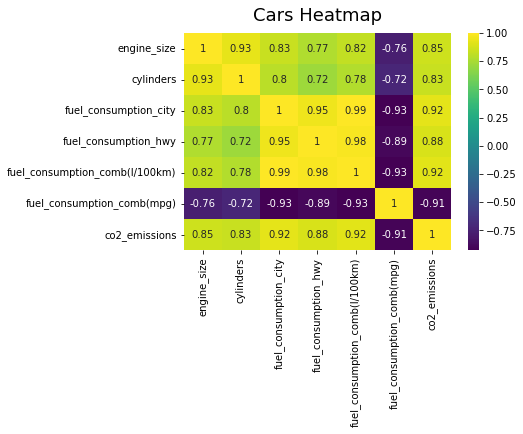

In [23]:
cor = data.corr()
heatmap = sns.heatmap(cor, annot=True , cmap='viridis')
heatmap.set_title('Cars Heatmap', fontdict={'fontsize':18}, pad=12);

In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data1 = data.copy()
data1["transmission"] = labelencoder.fit_transform(data1["transmission"])
data1["fuel_type"] = labelencoder.fit_transform(data1["fuel_type"])
data1.head()

make       model vehicle_class  engine_size  cylinders  transmission  \
0  ACURA         ILX       COMPACT          2.0          4             2   
1  ACURA         ILX       COMPACT          2.4          4             4   
2  ACURA  ILX HYBRID       COMPACT          1.5          4             3   
3  ACURA     MDX 4WD   SUV - SMALL          3.5          6             2   
4  ACURA     RDX AWD   SUV - SMALL          3.5          6             2   

   fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0          4                    9.9                   6.7   
1          4                   11.2                   7.7   
2          4                    6.0                   5.8   
3          4                   12.7                   9.1   
4          4                   12.1                   8.7   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  
0                             8.5                          33            196  
1                             9.6                          29            221  
2                             5.9                          48            136  
3                            11.1                          25            255  
4                            10.6                          27            244

In [25]:
data1.transmission.value_counts()

2    2720
0    1536
4    1019
1     540
3     458
Name: transmission, dtype: int64

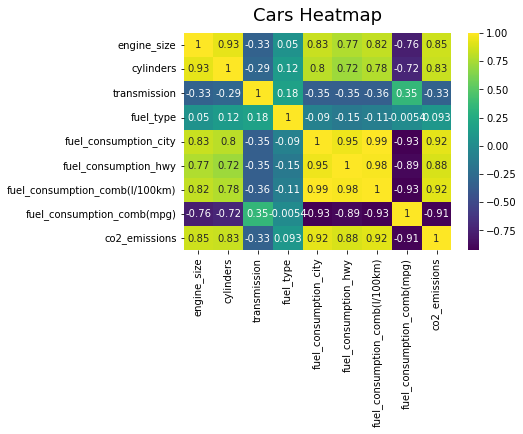

In [26]:
cor = data1.corr()
heatmap = sns.heatmap(cor, annot=True , cmap='viridis')
heatmap.set_title('Cars Heatmap', fontdict={'fontsize':18}, pad=12);

## Outliers

<AxesSubplot:>

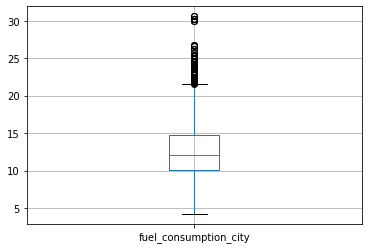

In [27]:
data1.boxplot("fuel_consumption_city")

<AxesSubplot:>

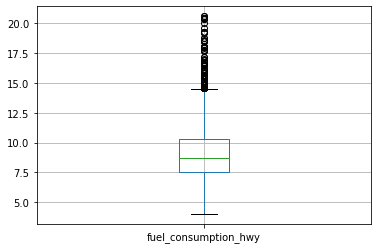

In [28]:
data1.boxplot("fuel_consumption_hwy")

<AxesSubplot:>

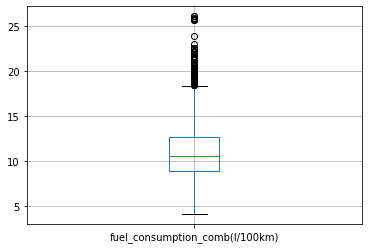

In [29]:
data1.boxplot("fuel_consumption_comb(l/100km)")

<AxesSubplot:>

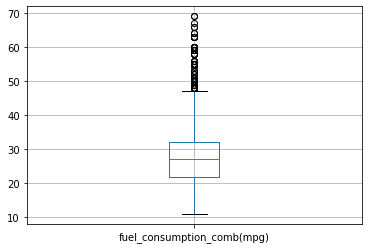

In [30]:
data1.boxplot("fuel_consumption_comb(mpg)")

<AxesSubplot:>

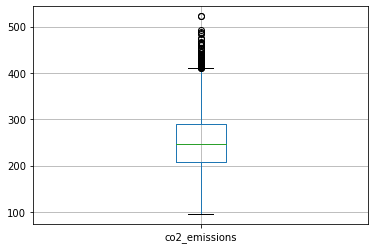

In [31]:
data1.boxplot("co2_emissions")

In [32]:
Q1=data1.quantile(0.25)
Q3=data1.quantile(0.75)
IQR=Q3-Q1
print(IQR)

engine_size                        1.7
cylinders                          2.0
transmission                       1.0
fuel_type                          1.0
fuel_consumption_city              4.6
fuel_consumption_hwy               2.8
fuel_consumption_comb(l/100km)     3.8
fuel_consumption_comb(mpg)        10.0
co2_emissions                     81.0
dtype: float64


In [33]:
data1=data1[~((data1<(Q1-1.5*IQR))|(data1>(Q3+1.5*IQR))).any(axis=1)]
data1.shape

(4454, 12)

<AxesSubplot:>

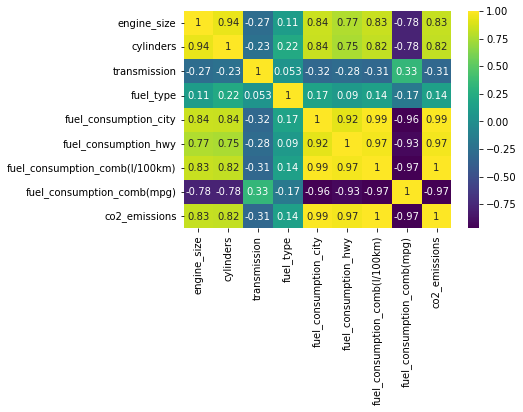

In [105]:
sns.heatmap(data1.corr(), annot=True , cmap='viridis')

## Checking Skewness and Kurtosis

In [106]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [107]:
data1.skew()

engine_size                       0.709158
cylinders                         0.397916
transmission                     -0.468290
fuel_type                         0.145936
fuel_consumption_city             0.281625
fuel_consumption_hwy              0.526755
fuel_consumption_comb(l/100km)    0.351529
fuel_consumption_comb(mpg)        0.561970
co2_emissions                     0.342593
dtype: float64

In [108]:
data1.kurt()

engine_size                      -0.255512
cylinders                        -1.151147
transmission                     -1.048206
fuel_type                        -1.965125
fuel_consumption_city            -0.420910
fuel_consumption_hwy             -0.022431
fuel_consumption_comb(l/100km)   -0.377977
fuel_consumption_comb(mpg)        0.048040
co2_emissions                    -0.410160
dtype: float64

In [109]:
data1.rename(columns={'engine_size': 'engine', 'cylinders': 'cyl', 'fuel_consumption_city': 'fuel_city', 'fuel_consumption_hwy':'fuel_hwy', 'fuel_consumption_comb(l/100km)':'fuel_combo', 'fuel_consumption_comb(mpg)':'fuel_mpg'}, inplace=True)

In [110]:
data1.columns

Index(['make', 'model', 'vehicle_class', 'engine', 'cyl', 'transmission',
       'fuel_type', 'fuel_city', 'fuel_hwy', 'fuel_combo', 'fuel_mpg',
       'co2_emissions'],
      dtype='object')

# Preparing the model

In [111]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols("co2_emissions ~ engine + cyl + transmission + fuel_type + fuel_city + fuel_hwy + fuel_combo + fuel_mpg",data=data1).fit()

In [112]:
model.params

Intercept        5.818586
engine          -0.162934
cyl              0.251080
transmission    -0.016716
fuel_type       -0.147218
fuel_city        5.878067
fuel_hwy         5.394496
fuel_combo      11.817223
fuel_mpg        -0.102451
dtype: float64

In [113]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          co2_emissions   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.691e+05
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:44:35   Log-Likelihood:                -11041.
No. Observations:                4454   AIC:                         2.210e+04
Df Residuals:                    4445   BIC:                         2.216e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.8186      1.847      3.150      0.002       2.197       9.440
engine          -0.1629      0.112     -1.459      0.145      -0.382       0.056
cyl              0.2511      0.088      2.867      0.004       0.079       0.423
transmission    -0.0167      0.048     -0.348      0.728      -0.111       0.077
fuel_type       -0.1472      0.094     -1.559      0.119      -0.332       0.038
fuel_city        5.8781      0.554     10.614      0.000       4.792       6.964
fuel_hwy         5.3945      0.456     11.825      0.000       4.500       6.289
fuel_combo      11.8172      1.006     11.745      0.000       9.845      13.790
fuel_mpg        -0.1025      0.033     -3.138      0.002      -0.166      -0.038
==============================================================================
Omnibus:                     5229.945   Durbin-Watson:                   0.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4080834.589
Skew:                          -5.392   Prob(JB):                         0.00
Kurtosis:                     150.895   Cond. No.                     1.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### We can see that Pvalue of transmission,  fuel_city,  fuel_hwy,  fuel_combo are more than 0.05 which is insignificant.

In [114]:
#Simple Linear Regression Model for transmission
model_trans=smf.ols("co2_emissions ~ transmission",data = data1 ).fit()  
model_trans.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          co2_emissions   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     472.5
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.18e-99
Time:                        14:44:36   Log-Likelihood:                -23557.
No. Observations:                4454   AIC:                         4.712e+04
Df Residuals:                    4452   BIC:                         4.713e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      274.0268      1.302    210.479      0.000     271.474     276.579
transmission   -16.0793      0.740    -21.737      0.000     -17.530     -14.629
==============================================================================
Omnibus:                      132.942   Durbin-Watson:                   0.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.208
Skew:                           0.428   Prob(JB):                     1.32e-31
Kurtosis:                       2.814   Cond. No.                         3.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
#Simple Linear Regression Model for fuel_city
model_fcity=smf.ols("co2_emissions ~ fuel_city",data = data1 ).fit()  
model_fcity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          co2_emissions   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.892e+05
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:44:37   Log-Likelihood:                -15380.
No. Observations:                4454   AIC:                         3.076e+04
Df Residuals:                    4452   BIC:                         3.078e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.1580      0.551     29.344      0.000      15.078      17.238
fuel_city     19.0899      0.044    434.965      0.000      19.004      19.176
==============================================================================
Omnibus:                      526.549   Durbin-Watson:                   0.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5396.502
Skew:                          -0.051   Prob(JB):                         0.00
Kurtosis:                       8.391   Cond. No.                         60.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
#Simple Linear Regression Model for fuel_hwy
model_fhwy=smf.ols("co2_emissions ~ fuel_hwy",data = data1 ).fit()  
model_fhwy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          co2_emissions   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 6.243e+04
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:44:38   Log-Likelihood:                -17747.
No. Observations:                4454   AIC:                         3.550e+04
Df Residuals:                    4452   BIC:                         3.551e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0528      1.037     -3.908      0.000      -6.086      -2.020
fuel_hwy      28.6453      0.115    249.869      0.000      28.421      28.870
==============================================================================
Omnibus:                      156.309   Durbin-Watson:                   1.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.772
Skew:                          -0.059   Prob(JB):                     1.94e-96
Kurtosis:                       4.537   Cond. No.                         48.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
#Simple Linear Regression Model
model_fcombo=smf.ols("co2_emissions ~ fuel_combo",data = data1 ).fit()  
model_fcombo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          co2_emissions   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.306e+06
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:44:38   Log-Likelihood:                -11122.
No. Observations:                4454   AIC:                         2.225e+04
Df Residuals:                    4452   BIC:                         2.226e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3391      0.223      1.519      0.129      -0.099       0.777
fuel_combo    23.2689      0.020   1142.784      0.000      23.229      23.309
==============================================================================
Omnibus:                     5152.634   Durbin-Watson:                   0.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3870803.756
Skew:                          -5.248   Prob(JB):                         0.00
Kurtosis:                     147.039   Cond. No.                         56.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Calculating VIF for only transmission,  fuel_city,  fuel_hwy,  fuel_combo  because Pvalue is insignificant for us.

In [118]:
rsq_trans= smf.ols("transmission ~ fuel_city + fuel_hwy + fuel_combo",data=data1).fit().rsquared  
vif_trans = 1/(1-rsq_trans) 

rsq_fuel_city= smf.ols("fuel_city ~ transmission + fuel_hwy + fuel_combo",data=data1).fit().rsquared  
vif_fuel_city = 1/(1-rsq_fuel_city)

rsq_fuel_hwy= smf.ols("fuel_hwy ~ fuel_city + transmission + fuel_combo",data=data1).fit().rsquared  
vif_fuel_hwy = 1/(1-rsq_fuel_hwy) 

rsq_fuel_combo= smf.ols("fuel_combo ~ fuel_city + transmission + fuel_hwy",data=data1).fit().rsquared  
vif_fuel_combo = 1/(1-rsq_fuel_combo) 

# Storing vif values in a data frame
d1 = {'Variables':["transmission","fuel_city","fuel_hwy","fuel_combo"],'VIF':[vif_trans,vif_fuel_city,vif_fuel_hwy,vif_fuel_combo]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

Variables          VIF
0  transmission     1.111636
1     fuel_city  1113.110111
2      fuel_hwy   320.277629
3    fuel_combo  2508.809496

In [119]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data = data1.copy()
data["vehicle_class"] = labelencoder.fit_transform(data["vehicle_class"])
data.head()

make    model  vehicle_class  engine  cyl  transmission  fuel_type  \
0  ACURA      ILX              0     2.0    4             2          4   
3  ACURA  MDX 4WD             11     3.5    6             2          4   
4  ACURA  RDX AWD             11     3.5    6             2          4   
5  ACURA      RLX              2     3.5    6             2          4   
6  ACURA       TL              2     3.5    6             2          4   

   fuel_city  fuel_hwy  fuel_combo  fuel_mpg  co2_emissions  
0        9.9       6.7         8.5        33            196  
3       12.7       9.1        11.1        25            255  
4       12.1       8.7        10.6        27            244  
5       11.9       7.7        10.0        28            230  
6       11.8       8.1        10.1        28            232

In [120]:
data=data.drop("model", axis=1)
data=data.drop("make", axis=1)

In [121]:
data.head()

vehicle_class  engine  cyl  transmission  fuel_type  fuel_city  fuel_hwy  \
0              0     2.0    4             2          4        9.9       6.7   
3             11     3.5    6             2          4       12.7       9.1   
4             11     3.5    6             2          4       12.1       8.7   
5              2     3.5    6             2          4       11.9       7.7   
6              2     3.5    6             2          4       11.8       8.1   

   fuel_combo  fuel_mpg  co2_emissions  
0         8.5        33            196  
3        11.1        25            255  
4        10.6        27            244  
5        10.0        28            230  
6        10.1        28            232

In [ ]:
df['transmission']=df['transmission'].map({"a":"Automatic",'am':'Automated manual','as':'Automatic with select shift','av':'Continuously variable','m':'Manual'})
df['fuel_type']=df['fuel_type'].map({"x":"Regular gasoline",'z':'Premium gasoline','d':'Diesel','e':'Ethanol (E85)','n':'Natural gas'})


In [122]:
array = data.values
X = array[:,0:9]
Y = array[:,9]

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=10)

## Feature Engineering- Method1

In [124]:
# feature extraction
from sklearn.feature_selection import RFE
model = LinearRegression()


rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X, Y)

fit.n_features_
fit.support_
fit.ranking_

array([6, 2, 1, 5, 3, 1, 1, 1, 4])

## Feature Engineering- Method2

In [125]:
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)

print(model.feature_importances_)

[0.10035002 0.09893603 0.017484   0.06597095 0.03062327 0.19467657
 0.20243734 0.20672659 0.08279523]


# Model Validation Methods
## Linear Regression 

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=10)

model = LinearRegression()
model.fit(X_train,Y_train)
model_pred=model.predict(X_test)

model_accuracy_Linear=r2_score(Y_test,model_pred)
print('Linear Regression: ',model_accuracy_Linear)

Linear Regression:  0.9949800905275695


## Linear Regression crossvalidation

In [127]:
model = LinearRegression()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9949800905275695

## Ridge Regression

In [128]:
from sklearn.linear_model import Ridge
model = Ridge(alpha = 1)
model.fit(X_train,Y_train)
model_pred=model.predict(X_test)

model_accuracy_Ridge=r2_score(Y_test,model_pred)
print('Ridge: ',model_accuracy_Ridge)

Ridge:  0.9949828644509044


## Lasso Regression

In [129]:
from sklearn.linear_model import Lasso
model = Lasso(alpha = 0.005)
model.fit(X_train,Y_train)
model_pred=model.predict(X_test)

model_accuracy_Lasso=r2_score(Y_test,model_pred)
print('Lasso: ',model_accuracy_Lasso)

Lasso:  0.9949383815024052


## DecisionTree Regression

In [130]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,Y_train)
model_pred=model.predict(X_test)

model_accuracy_DecisionTree =r2_score(Y_test,model_pred)
print('Decision Tree: ',model_accuracy_DecisionTree)

Decision Tree:  0.9940086058265097


## Gaussian Naive Bayes

In [131]:
# Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10)
model = GaussianNB()
model.fit(X_train,Y_train)
model_pred=model.predict(X_test)

model_accuracy_Gaussion_NB =r2_score(Y_test,model_pred)
print('Gaussian Naive Bayes: ',model_accuracy_Gaussion_NB)

Gaussian Naive Bayes:  0.9910966997552884


## KNN 

In [132]:
# KNN 
from sklearn.neighbors import KNeighborsRegressor

kfold = KFold(n_splits=10)
model = KNeighborsRegressor()
model.fit(X_train,Y_train)
model_pred=model.predict(X_test)

model_accuracy_KNN=r2_score(Y_test,model_pred)
print('KNN: ',model_accuracy_KNN)

KNN:  0.9917148573396303


## Support Vector Classifier

In [133]:
from sklearn.svm import SVC

kfold = KFold(n_splits=10)

model = SVC()
model.fit(X_train,Y_train)
model_pred=model.predict(X_test)

model_accuracy_SVC=r2_score(Y_test,model_pred)
print('SVC: ',model_accuracy_SVC)

SVC:  0.8819153616075989


## AdaBoost

In [134]:
# AdaBoost Regression
from sklearn.ensemble import AdaBoostRegressor

num_trees = 10

kfold = KFold(n_splits=10)
model = AdaBoostRegressor()

model.fit(X_train,Y_train)
model_pred=model.predict(X_test)

model_accuracy_AdaBoost=r2_score(Y_test,model_pred)
print('AdaBoost: ',model_accuracy_AdaBoost)

AdaBoost:  0.9926234211248313


## Bagged Decision Tree

In [135]:
# Bagged Decision Trees for Regression

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


kfold = KFold(n_splits=10)
cart = DecisionTreeRegressor()
num_trees = 100
model = BaggingRegressor(base_estimator=cart, n_estimators=num_trees)

model.fit(X_train,Y_train)
model_pred=model.predict(X_test)

model_accuracy_Bagged_DecisionTree=r2_score(Y_test,model_pred)
print('Bagged Decision: ',model_accuracy_Bagged_DecisionTree)

Bagged Decision:  0.9950205127350458


## Random Forest

In [136]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train,Y_train)
model_pred=model.predict(X_test)

model_accuracy_RF=r2_score(Y_test,model_pred)
print('Random Forest: ',model_accuracy_RF)

Random Forest:  0.9949987280807053


In [137]:
model_accuracy=pd.Series([model_accuracy_Linear,model_accuracy_Ridge,model_accuracy_Lasso,model_accuracy_DecisionTree,model_accuracy_Gaussion_NB,model_accuracy_KNN,model_accuracy_SVC,model_accuracy_AdaBoost,model_accuracy_Bagged_DecisionTree,model_accuracy_RF])

In [138]:
models=pd.Series(["Linear Regression","Ridge Regression","Lasso Regression","Decision Tree","Gaussian Naive Bayes","KNN","Support Vector Classifier","AdaBoost","Bagged Decision Tree","Random Forest"])

In [139]:
data={'Model':models,'Accuracy':model_accuracy}

In [140]:
data_accuracy=pd.DataFrame(data)

In [141]:
data_accuracy

Model  Accuracy
0          Linear Regression  0.994980
1           Ridge Regression  0.994983
2           Lasso Regression  0.994938
3              Decision Tree  0.994009
4       Gaussian Naive Bayes  0.991097
5                        KNN  0.991715
6  Support Vector Classifier  0.881915
7                   AdaBoost  0.992623
8       Bagged Decision Tree  0.995021
9              Random Forest  0.994999